# Decision Tree (in classification)
* Decision tree is a supervised machine learning technique that can be used for both Classification and Regression problems, but mostly it is preferred for solving Classification problems.
* In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.
>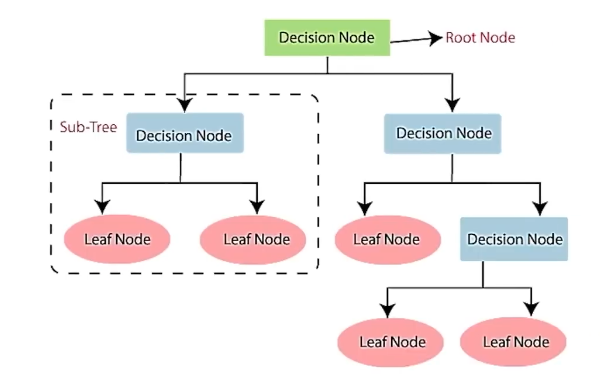
### Important terminology related to decision tree
* **Root Node**: It represents the entire population or sample and this further gets divided into two or more homogeneous sets.
* **Splitting**: It is a process of dividing a node into two or more sub-nodes.
* **Decision Node**: When a sub-node splits into further sub-nodes, then it is called the decision nodes.
* **Leaf/Terminal Node**: Nodes do not split is called Leaf or Terminal nodes.
* **Pruning**: When we remove sub-nodes of a decision node, this process is called pruning. you can the opposite process of splitting.
* **Branch/Sub-Tree**: A subsection of the entire tree is called branch or sub-tree.
* **Parent and Child Node**: A node, which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.
### Attribute Selection Measures
* This measurement, we can easily select the best attribute for the nodes of the tree. There are two popular techniques for ASM, which are:
    * Information Gain
    * Entropy/Gini Index
### Entropy
* Entropy is a metric to measure the impurity in a given attribute. It specifies randomness in data.
> 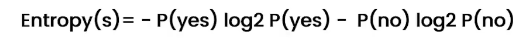
* Where:
    * s = Total number of samples
    * P(yes) = probablity of yes
    * P(no) = probablity of no
### Gini index
* Gini index is a measure of impurity or purity used while creating a decision tree in the CART(Classification and Regression Tree) algorithm.
* An attribute with the low Gini index should be prefarred as compared to the high Gini index
>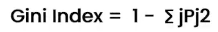
### Information Gain
* Information gain is the measurement of changes in entropy after the segmentation of a dataset based on an attribute. It calculates how much information a feature provides us about a class.
>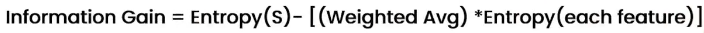


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
df = pd.read_csv('../../dataset/Social_Network_Ads.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [25]:
df.drop(columns=['User ID','Gender'],inplace=True)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [26]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [27]:
df.duplicated().sum()

np.int64(33)

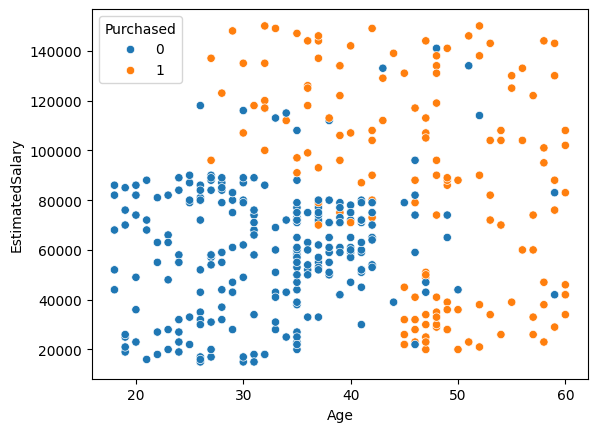

In [44]:
sns.scatterplot(x=df['Age'],y=df['EstimatedSalary'],hue=df['Purchased'])
plt.show()

In [29]:
x = df.drop(columns=['Purchased'])
y = df['Purchased']

In [30]:
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
dt.score(x_train,y_train), dt.score(x_test,y_test)

(0.9966666666666667, 0.84)

In [35]:
dt.predict(ss.transform([[47,30000]]))

e:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
e:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

#### Graphical analysis of the decision tree algorithm

In [36]:
from sklearn.tree import plot_tree

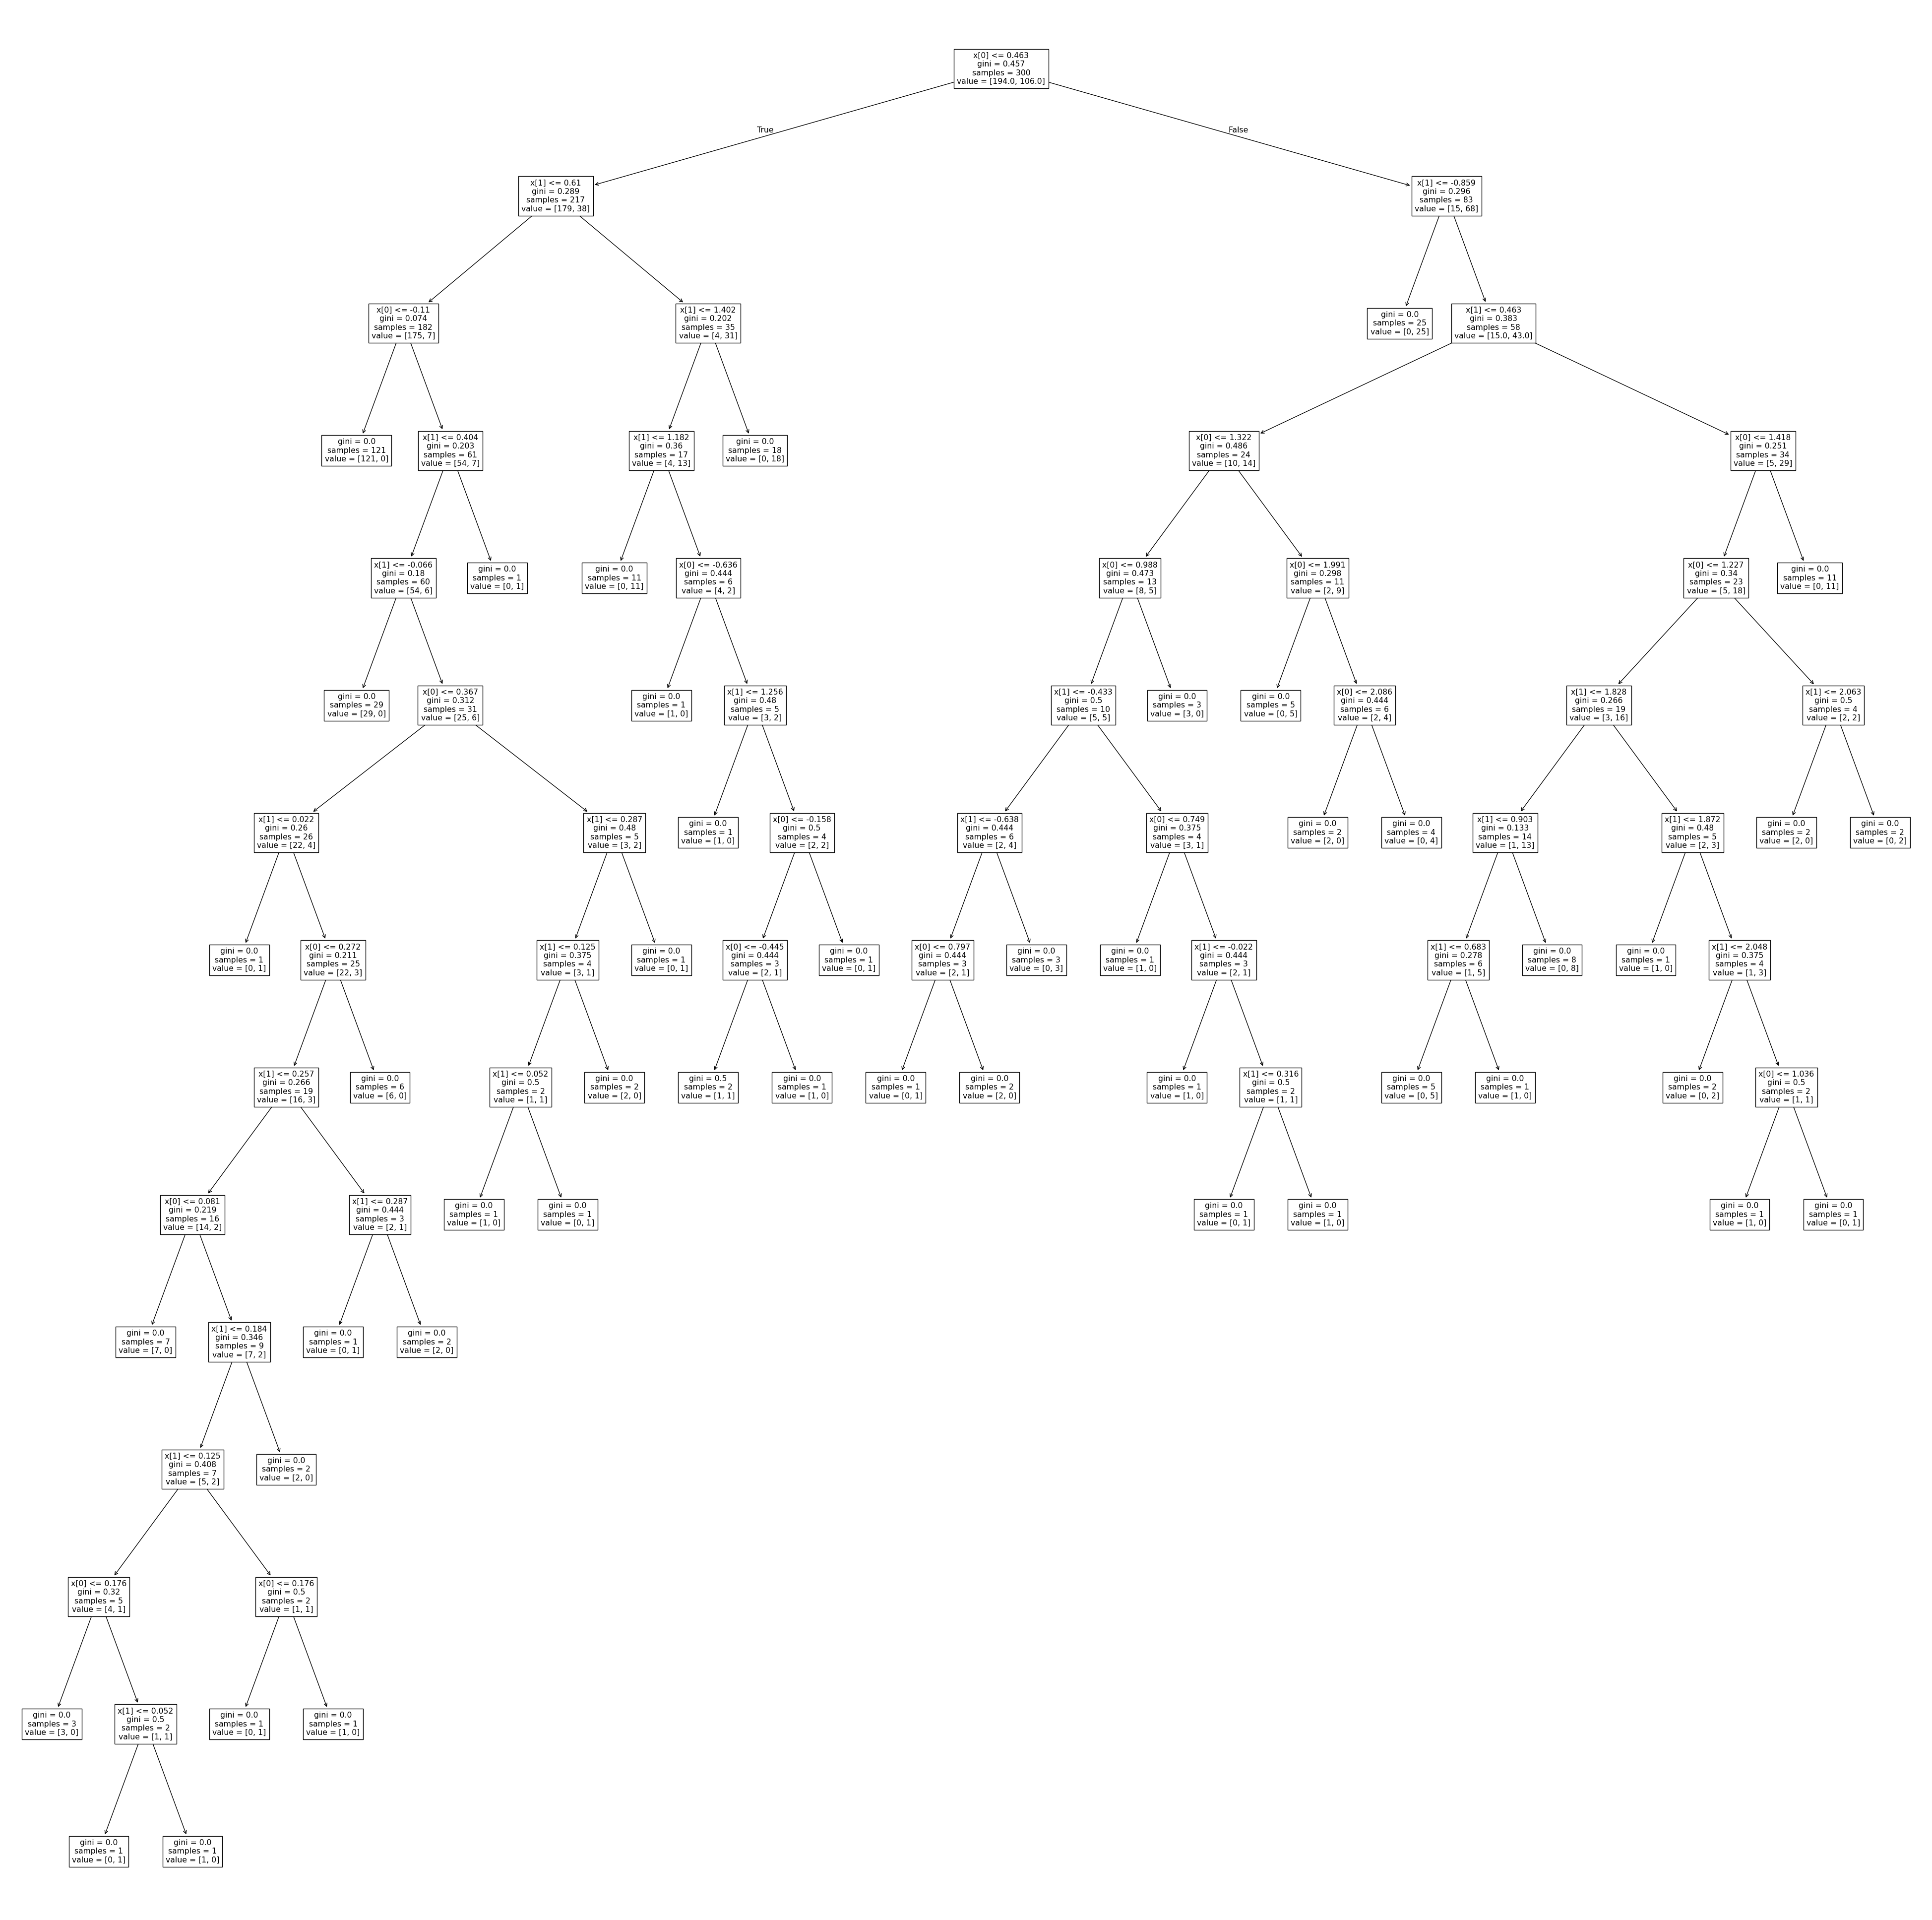

In [37]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig('decision_tree_graph.jpg')
plt.show()

In [38]:
from mlxtend.plotting import plot_decision_regions

e:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


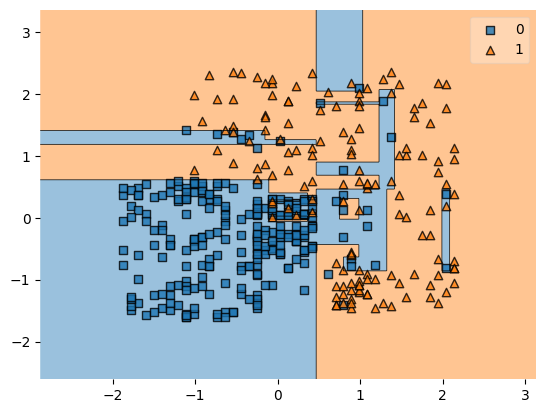

In [39]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

In [40]:
dt2 = DecisionTreeClassifier(criterion='entropy')
dt2.fit(x_train,y_train)
dt2.score(x_train,y_train),dt2.score(x_test,y_test)

(0.9966666666666667, 0.83)

In [41]:
dt2.predict(ss.transform([[45,22000]]))

e:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
e:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

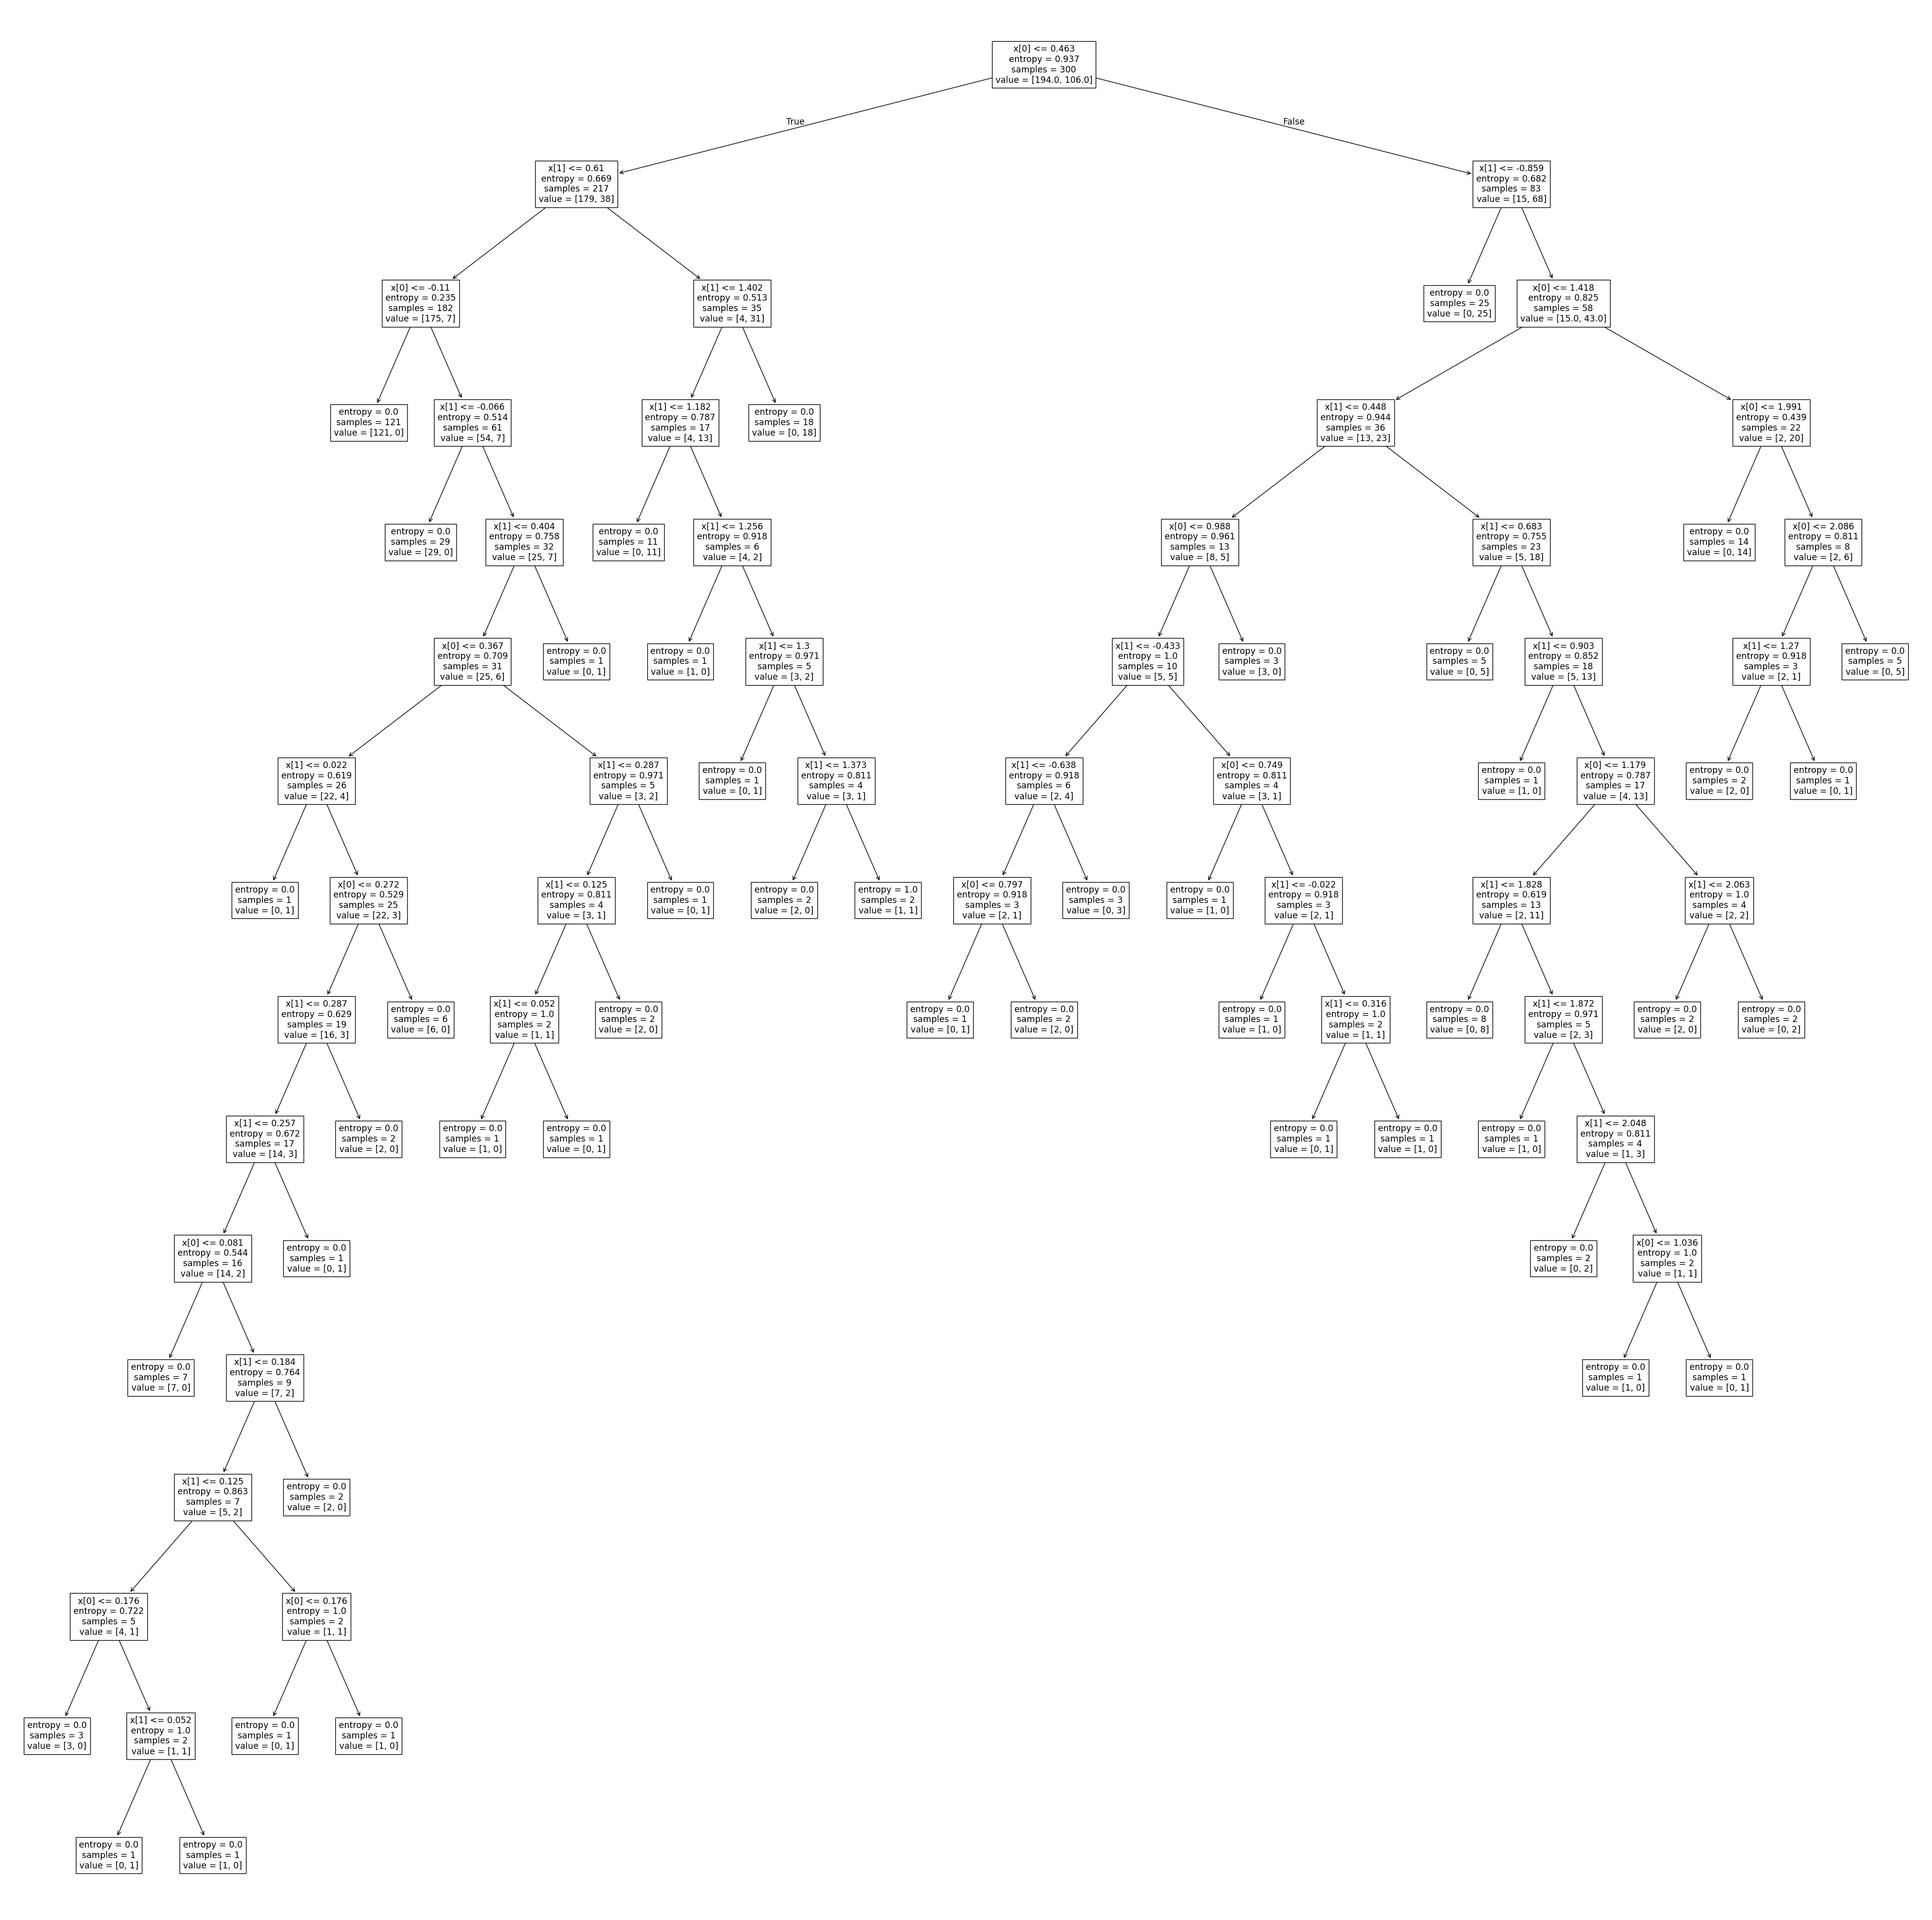

In [42]:
plt.figure(figsize=(50,50))
plot_tree(dt2)
plt.show()

e:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


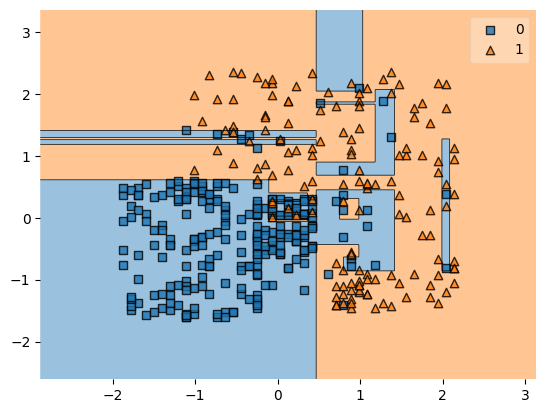

In [43]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt2)
plt.show()

## Pruning

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions

In [86]:
df = pd.read_csv('../../dataset/Social_Network_Ads.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [87]:
df.drop(columns=['User ID','Gender'],inplace=True)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [88]:
x = df.drop(columns=['Purchased'])
y = df['Purchased']

* Now we are trying to creating the two models and then compairing them and also performing pruning in both of them
* the first model is created without standardizing the data
* and the other one is create with the help of standardizing the data

In [89]:
ss = StandardScaler()
ss_x = pd.DataFrame(ss.fit_transform(x),columns=x.columns)
ss_x.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [90]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)
ss_x_train, ss_x_test, ss_y_train, ss_y_test = train_test_split(ss_x, y, test_size=0.25, random_state=42)

In [91]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
ss_dt = DecisionTreeClassifier()
ss_dt.fit(ss_x_train, ss_y_train)

DecisionTreeClassifier()

In [92]:
print(dt.score(x_train,y_train), dt.score(x_test,y_test))
print(ss_dt.score(ss_x_train,ss_y_train), ss_dt.score(ss_x_test,ss_y_test))

0.9966666666666667 0.85
0.9966666666666667 0.83


In [ ]:
plt.figure(figsize=(100,100))
plt.subplot(1,2,1)
plot_tree(dt)
plt.subplot(1,2,2)
plot_tree(ss_dt)
plt.savefig('decision_tree_graph.jpg')
plt.show()

SyntaxError: incomplete input (1208324234.py, line 7)

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Decision region without standardization of data')
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.subplot(1,2,2)
plt.title('Decision region using standardization of data')
plot_decision_regions(ss_x.to_numpy(),y.to_numpy(),clf=ss_dt)
plt.show()

SyntaxError: incomplete input (2024624378.py, line 8)

### 1. Pre-Pruning

In [95]:
dt2 = DecisionTreeClassifier(max_depth=5)
ss_dt2 = DecisionTreeClassifier(max_depth=5)
dt2.fit(x_train,y_train)
ss_dt2.fit(ss_x_train,ss_y_train)

DecisionTreeClassifier(max_depth=5)

In [97]:
print(dt2.score(x_train,y_train), dt2.score(x_test,y_test))
print(ss_dt2.score(ss_x_train, ss_y_train), ss_dt2.score(ss_x_test, ss_y_test))

0.9333333333333333 0.89
0.9333333333333333 0.89


In [ ]:
plt.figure(figsize=(100,100))
plt.subplot(1,2,1)
plot_tree(dt2)
plt.subplot(1,2,2)
plot_tree(ss_dt2)
plt.savefig('decision_tree_graph.jpg')
plt.show()

SyntaxError: incomplete input (4008488614.py, line 7)

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt2)
plt.subplot(1,2,2)
plot_decision_regions(ss_x.to_numpy(),y.to_numpy(),clf=ss_dt2)
plt.show()

SyntaxError: incomplete input (745756842.py, line 6)

### 2. Post-Pruning

In [107]:
print('without standard data')
for i in range(1,21):
    dt3 = DecisionTreeClassifier(max_depth=i)
    dt3.fit(x_train,y_train)
    print(dt3.score(x_train,y_train),dt3.score(x_test,y_test),i)

without standard data
0.8233333333333334 0.89 1
0.9133333333333333 0.92 2
0.9133333333333333 0.92 3
0.9333333333333333 0.91 4
0.9333333333333333 0.89 5
0.9566666666666667 0.89 6


0.97 0.85 7
0.9766666666666667 0.84 8
0.9866666666666667 0.85 9
0.99 0.85 10
0.99 0.85 11
0.99 0.84 12
0.9933333333333333 0.85 13
0.9966666666666667 0.83 14
0.9966666666666667 0.85 15
0.9966666666666667 0.84 16
0.9966666666666667 0.84 17
0.9966666666666667 0.84 18
0.9966666666666667 0.85 19
0.9966666666666667 0.85 20


In [106]:
print('using standard data')
for i in range(1,21):
    ss_dt3 = DecisionTreeClassifier(max_depth=i)
    ss_dt3.fit(ss_x_train,ss_y_train)
    print(ss_dt3.score(ss_x_train,ss_y_train),ss_dt3.score(ss_x_test,ss_y_test),i)

using standard data
0.8233333333333334 0.89 1
0.9133333333333333 0.92 2
0.9133333333333333 0.92 3
0.9333333333333333 0.91 4
0.9333333333333333 0.89 5
0.9566666666666667 0.89 6
0.97 0.85 7
0.9733333333333334 0.85 8
0.9866666666666667 0.85 9
0.99 0.85 10
0.99 0.84 11
0.99 0.85 12
0.9933333333333333 0.84 13
0.9966666666666667 0.83 14
0.9966666666666667 0.84 15
0.9966666666666667 0.83 16
0.9966666666666667 0.83 17
0.9966666666666667 0.84 18
0.9966666666666667 0.83 19
0.9966666666666667 0.84 20


* in the above output we can clearly see that the score of the training data and testing data is almost same 
* that's why we are selecting the value of max_depth is 2 or 3

In [113]:
dt3 = DecisionTreeClassifier(max_depth=3)
ss_dt3 = DecisionTreeClassifier(max_depth=3)
dt3.fit(x_train,y_train)
ss_dt3.fit(ss_x_train,ss_y_train)

DecisionTreeClassifier(max_depth=3)

In [114]:
print(dt3.score(x_train,y_train),dt3.score(x_test,y_test))
print(ss_dt3.score(ss_x_train,ss_y_train),ss_dt3.score(ss_x_test,ss_y_test))

0.9133333333333333 0.92
0.9133333333333333 0.92


e:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
e:\Windows 10\Python Files\Data Science\py_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


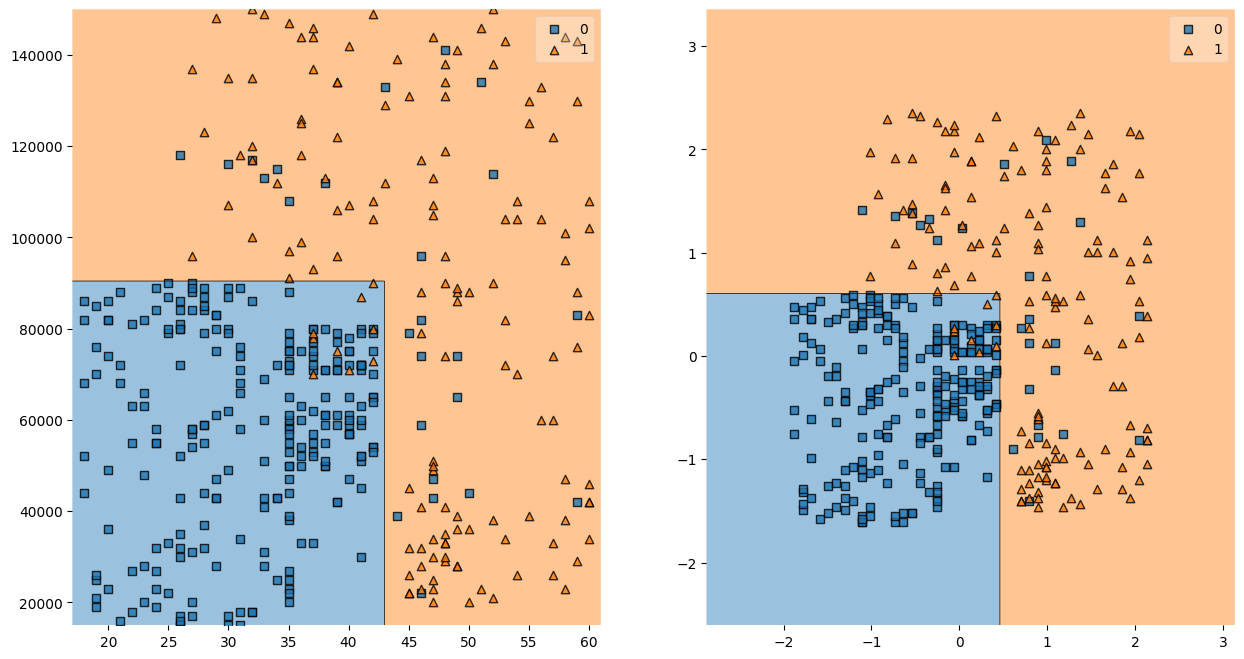

In [115]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt3)
plt.subplot(1,2,2)
plot_decision_regions(ss_x.to_numpy(),y.to_numpy(),clf=ss_dt3)
plt.show()

# Decision Tree (in Regression)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../../dataset/Salary_Data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [4]:
df.drop(columns=['Gender','Education Level','Job Title'],inplace=True)
df.head()

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0


In [5]:
df.rename(columns={'Years of Experience':'Experience'},inplace=True)
df.head()

,Age,Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0


In [6]:
df.isnull().sum()

Age           2
Experience    3
Salary        5
dtype: int64

In [7]:
for i in df.columns:
    df[i] = df[i].fillna(value=df[i].mean())
df.isnull().sum()

Age           0
Experience    0
Salary        0
dtype: int64

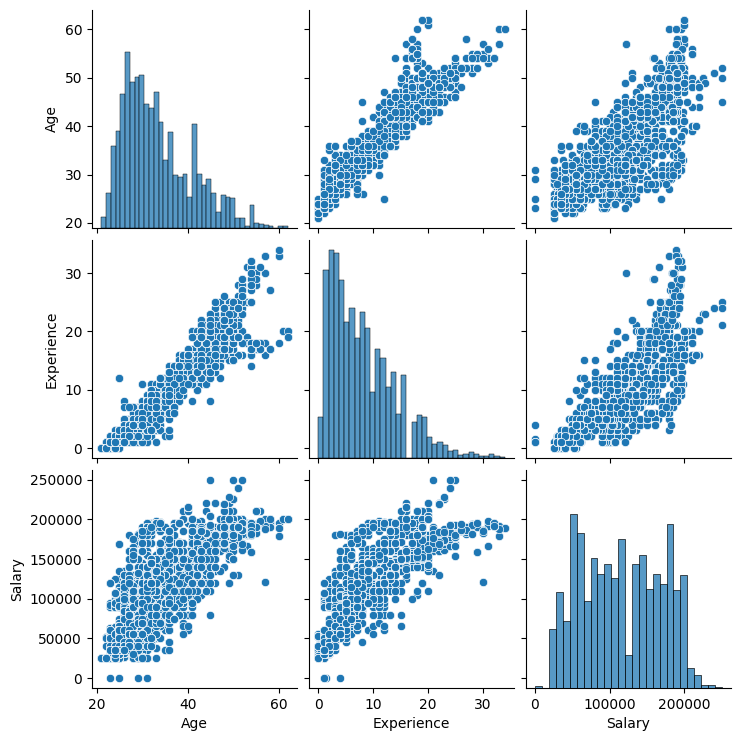

In [8]:
sns.pairplot(df)
plt.show()

In [9]:
x = df.drop(columns=['Salary'])
y = df['Salary']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [11]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [12]:
dt.score(x_train,y_train), dt.score(x_test,y_test)

(0.8570611963260495, 0.8301852280112418)